# Práctica 3 
Isabela Trujillo y Laura Vargas

In [6]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io
mat =scipy.io.loadmat("c:/Users/lauri/Documents/Semestre_8/Biosenales/Lab_biosenales/Practica_3/signals.mat")
print (mat.keys())
fs=mat['Fs']
print(fs)

dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'ECG_asRecording', 'ECG_filtered', 'EMG_filtered1', 'EMG_filtered2', 'EMG_asRecording1', 'EMG_asRecording2'])
[[1024]]


### Función cuadrático RMS

In [7]:
def rms(señal):
	return np.sqrt(np.mean(señal**2))
ECGf=mat['ECG_filtered']
x=rms(ECGf)
print('El rms de la señal es: ',x)

El rms de la señal es:  286.30557115249496


### Vector de tiempo

In [8]:
def tiempo(fs,archivo):
    paso = 1/fs
    fin = len(archivo[0])
    dato=paso*fin
    tiempo = np.arange(0,dato,paso)
    print(fin)
    return tiempo
t1=tiempo(fs,ECGf)
f=len(ECGf[0])
print('t:',len(t1),'f: ',f)

30720
t: 30720 f:  30720


C:\Users\lauri\AppData\Local\Temp\ipykernel_44540\2619928201.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tiempo = np.arange(0,dato,paso)


### Graficación señal filtradas y sin filtrar

C:\Users\lauri\AppData\Local\Temp\ipykernel_44540\2619928201.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tiempo = np.arange(0,dato,paso)


30720
x:  [[3904.31689453 3939.203125   3976.00683594 ... 4366.41064453
  4365.31103516 4370.91796875]] y:  [0.00000000e+00 9.76562500e-04 1.95312500e-03 ... 2.99970703e+01
 2.99980469e+01 2.99990234e+01]


Text(0.5, 1.0, 'ECGasRecording')

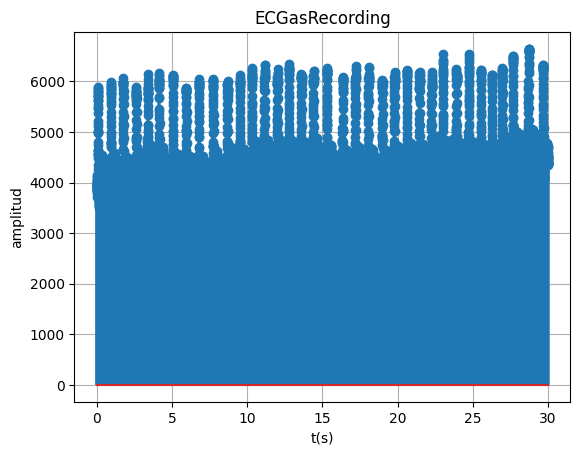

In [17]:
ECGr=mat['ECG_asRecording']
t2=tiempo(fs,ECGr)

print('x: ',ECGr,'y: ',t2)

plt.figure()
plt.stem(t2,ECGr[0])
plt.grid()
plt.xlabel('t(s)')
plt.ylabel('amplitud')
plt.title('ECGasRecording')


Text(0.5, 1.0, 'ECGasRecording')

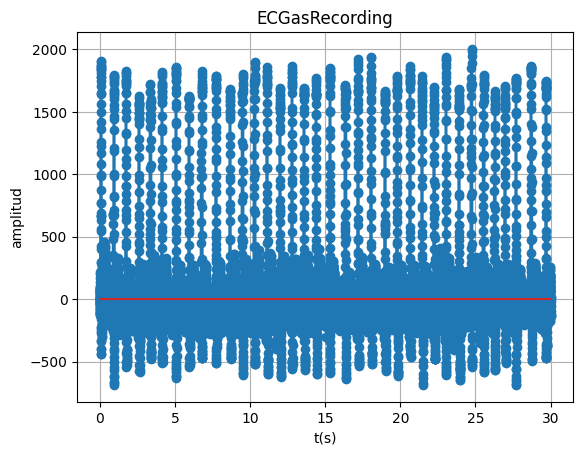

In [15]:
plt.stem(t2,ECGf[0])
plt.grid()
plt.xlabel('t(s)')
plt.ylabel('amplitud')
plt.title('ECGasRecording')

Se realiza un filtro pasa bandas, esto porque se disminuye la cantidad de datos entre el rango de 500 y 2000 aproximadamente 